In [ ]:
# Imports
from google.colab import files
import zipfile
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# Uploading csv
uploaded = files.upload()

Saving final_data.csv.zip to final_data.csv.zip


In [3]:
# Unzipping  uploaded file
with zipfile.ZipFile("final_data.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

# Checking file names
print(os.listdir())

['.config', 'final_data.csv', '__MACOSX', 'final_data.csv.zip', 'sample_data']


In [4]:
# Creating dataframe
df = pd.read_csv("final_data.csv")
df.head()

,won_county,candidate,party_simplified,mode,state_name,nyt headline mentions,nyt lead paragraph mentions,fox headline mentions,estimate total population,estimate total population male,...,percent hispanic or latino and total population not hispanic or latino native hawaiian and other pacific islander alone,percent hispanic or latino and total population not hispanic or latino some other race alone,percent hispanic or latino and total population not hispanic or latino two or more races,percent hispanic or latino and total population not hispanic or latino two or more races two races including some other race,"percent hispanic or latino and total population not hispanic or latino two or more races two races excluding some other race, and three or more races",percent total housing units,"percent citizen, voting age population citizen, 18 and over population","percent citizen, voting age population citizen, 18 and over population male","percent citizen, voting age population citizen, 18 and over population female",county
0,0,writein,unaffiliated,total,texas,0.0,0.0,0.0,57917.0,35438.0,...,0.0,0.1,2.6,0.5,2.1,(x),44815.0,62.9,37.1,anderson county
1,0,joseph r biden,democrat,total,texas,1278.0,2177.0,1295.0,57917.0,35438.0,...,0.0,0.1,2.6,0.5,2.1,(x),44815.0,62.9,37.1,anderson county
2,0,jo jorgensen,libertarian,total,texas,0.0,0.0,2.0,57917.0,35438.0,...,0.0,0.1,2.6,0.5,2.1,(x),44815.0,62.9,37.1,anderson county
3,0,howie hawkins,green party,total,texas,2.0,4.0,0.0,57917.0,35438.0,...,0.0,0.1,2.6,0.5,2.1,(x),44815.0,62.9,37.1,anderson county
4,1,donald j trump,republican,total,texas,3801.0,4775.0,2622.0,57917.0,35438.0,...,0.0,0.1,2.6,0.5,2.1,(x),44815.0,62.9,37.1,anderson county


In [7]:
# FEATURE ENGINEERING & PREPROCESSING
# Separating Numeric and Categorical Features

numeric_features = df.select_dtypes(include='number').columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

print("\nNumeric Features:", numeric_features)
print("\nCategorical Features:", categorical_features)


Numeric Features: ['won_county', 'nyt headline mentions', 'nyt lead paragraph mentions', 'fox headline mentions', 'estimate total population', 'estimate total population male', 'estimate total population female', 'estimate total population sex ratio (males per 100 females)', 'estimate total population under 5 years', 'estimate total population 5 to 9 years', 'estimate total population 10 to 14 years', 'estimate total population 15 to 19 years', 'estimate total population 20 to 24 years', 'estimate total population 25 to 34 years', 'estimate total population 35 to 44 years', 'estimate total population 45 to 54 years', 'estimate total population 55 to 59 years', 'estimate total population 60 to 64 years', 'estimate total population 65 to 74 years', 'estimate total population 75 to 84 years', 'estimate total population 85 years and over', 'estimate total population median age (years)', 'estimate total population under 18 years', 'estimate total population 16 years and over', 'estimate to

In [8]:
# Standardizing Numeric Features
scaler = StandardScaler()
X_numeric_scaled = pd.DataFrame(
    scaler.fit_transform(df[numeric_features]),
    columns=numeric_features
)

In [9]:
# Encoding Categorical Features
categorical_to_encode = ['candidate', 'party_simplified', 'mode', 'state_name', 'percent total population sex ratio (males per 100 females)', 'percent total population median age (years)', 'percent total population 18 years and over sex ratio (males per 100 females)', 'percent total population 65 years and over sex ratio (males per 100 females)', 'percent total housing units', 'county']
df_encoded = pd.get_dummies(df[categorical_to_encode], drop_first=True)

In [11]:
# Combining Dataset
other_features = []
X_final = pd.concat(
    [X_numeric_scaled, df_encoded, df[other_features]],
    axis=1
)

print("\nFinal feature matrix shape:", X_final.shape)
X_final.head()


Final feature matrix shape: (884751, 735)


,won_county,nyt headline mentions,nyt lead paragraph mentions,fox headline mentions,estimate total population,estimate total population male,estimate total population female,estimate total population sex ratio (males per 100 females),estimate total population under 5 years,estimate total population 5 to 9 years,...,county_woodford county,county_wyoming county,county_yates county,county_yoakum county,county_yolo county,county_york county,county_young county,county_yuba county,county_zapata county,county_zavala county
0,-0.980830,-0.687866,-0.737579,-0.750709,-0.611121,-0.604647,-0.617342,8.1592,-0.622341,-0.62664,...,False,False,False,False,False,False,False,False,False,False
1,-0.980830,0.183149,0.421176,0.493327,-0.611121,-0.604647,-0.617342,8.1592,-0.622341,-0.62664,...,False,False,False,False,False,False,False,False,False,False
2,-0.980830,-0.687866,-0.737579,-0.748788,-0.611121,-0.604647,-0.617342,8.1592,-0.622341,-0.62664,...,False,False,False,False,False,False,False,False,False,False
3,-0.980830,-0.686503,-0.735450,-0.750709,-0.611121,-0.604647,-0.617342,8.1592,-0.622341,-0.62664,...,False,False,False,False,False,False,False,False,False,False
4,1.019544,1.902688,1.804017,1.768103,-0.611121,-0.604647,-0.617342,8.1592,-0.622341,-0.62664,...,False,False,False,False,False,False,False,False,False,False


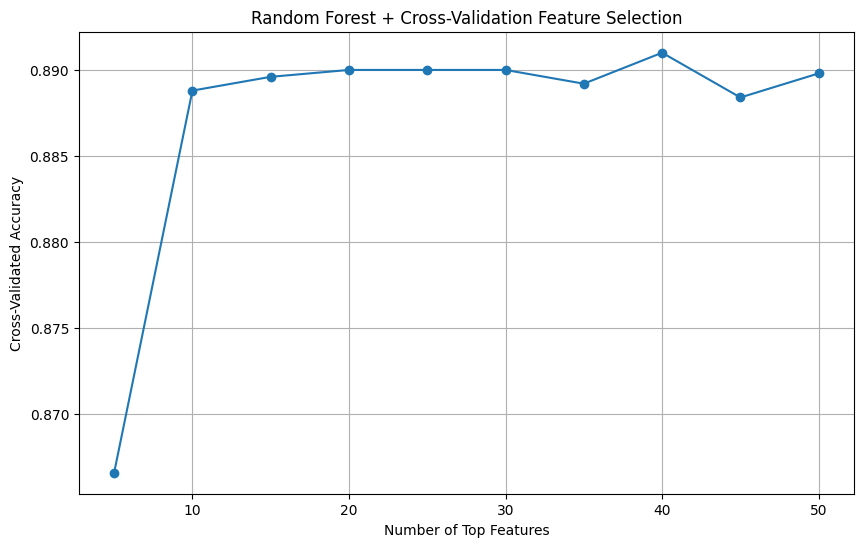

Best number of features: 40
Final Selected Features: Index(['fox headline mentions', 'nyt lead paragraph mentions',
       'nyt headline mentions',
       'percent total population two or more races white and american indian and alaska native',
       'percent citizen, voting age population citizen, 18 and over population female',
       'percent citizen, voting age population citizen, 18 and over population male',
       'percent hispanic or latino and total population not hispanic or latino black or african american alone',
       'estimate total population one race asian asian indian',
       'percent race alone or in combination with one or more other races total population black or african american',
       'percent total population one race black or african american',
       'percent total population one race asian asian indian',
       'estimate hispanic or latino and total population not hispanic or latino black or african american alone',
       'estimate race alone or in comb

In [16]:
# Feature Selection
sample_size = 10000
numeric_df_sampled = df.select_dtypes(include='number').sample(n=sample_size, random_state=42)

# Correlation filter
correlations = numeric_df_sampled.corr()['won_county'].abs().sort_values(ascending=False)
top_50_features = correlations.index[1:51]

X_top50 = df[top_50_features]
y_target = df['won_county']

# Random Forest
sample_size_rf = 5000
sample_indices = np.random.choice(X_top50.index, size=sample_size_rf, replace=False)
X_sampled = X_top50.loc[sample_indices]
y_sampled = y_target.loc[sample_indices]

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_sampled, y_sampled)

importances = pd.Series(rf.feature_importances_, index=X_sampled.columns)
sorted_features = importances.sort_values(ascending=False).index

# Cross-validation to find best number of features
feature_counts = list(range(5, 51, 5))
mean_scores = []

for k in feature_counts:
    selected = sorted_features[:k]
    X_k = X_sampled[selected]

    scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42),
                              X_k, y_sampled, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

# Plotting performance
plt.figure(figsize=(10,6))
plt.plot(feature_counts, mean_scores, marker='o')
plt.xlabel('Number of Top Features')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Random Forest + Cross-Validation Feature Selection')
plt.grid(True)
plt.show()

# Best number of features
best_k = feature_counts[np.argmax(mean_scores)]
print(f"Best number of features: {best_k}")

# Final selected features
final_selected_features = sorted_features[:best_k]
print("Final Selected Features:", final_selected_features)

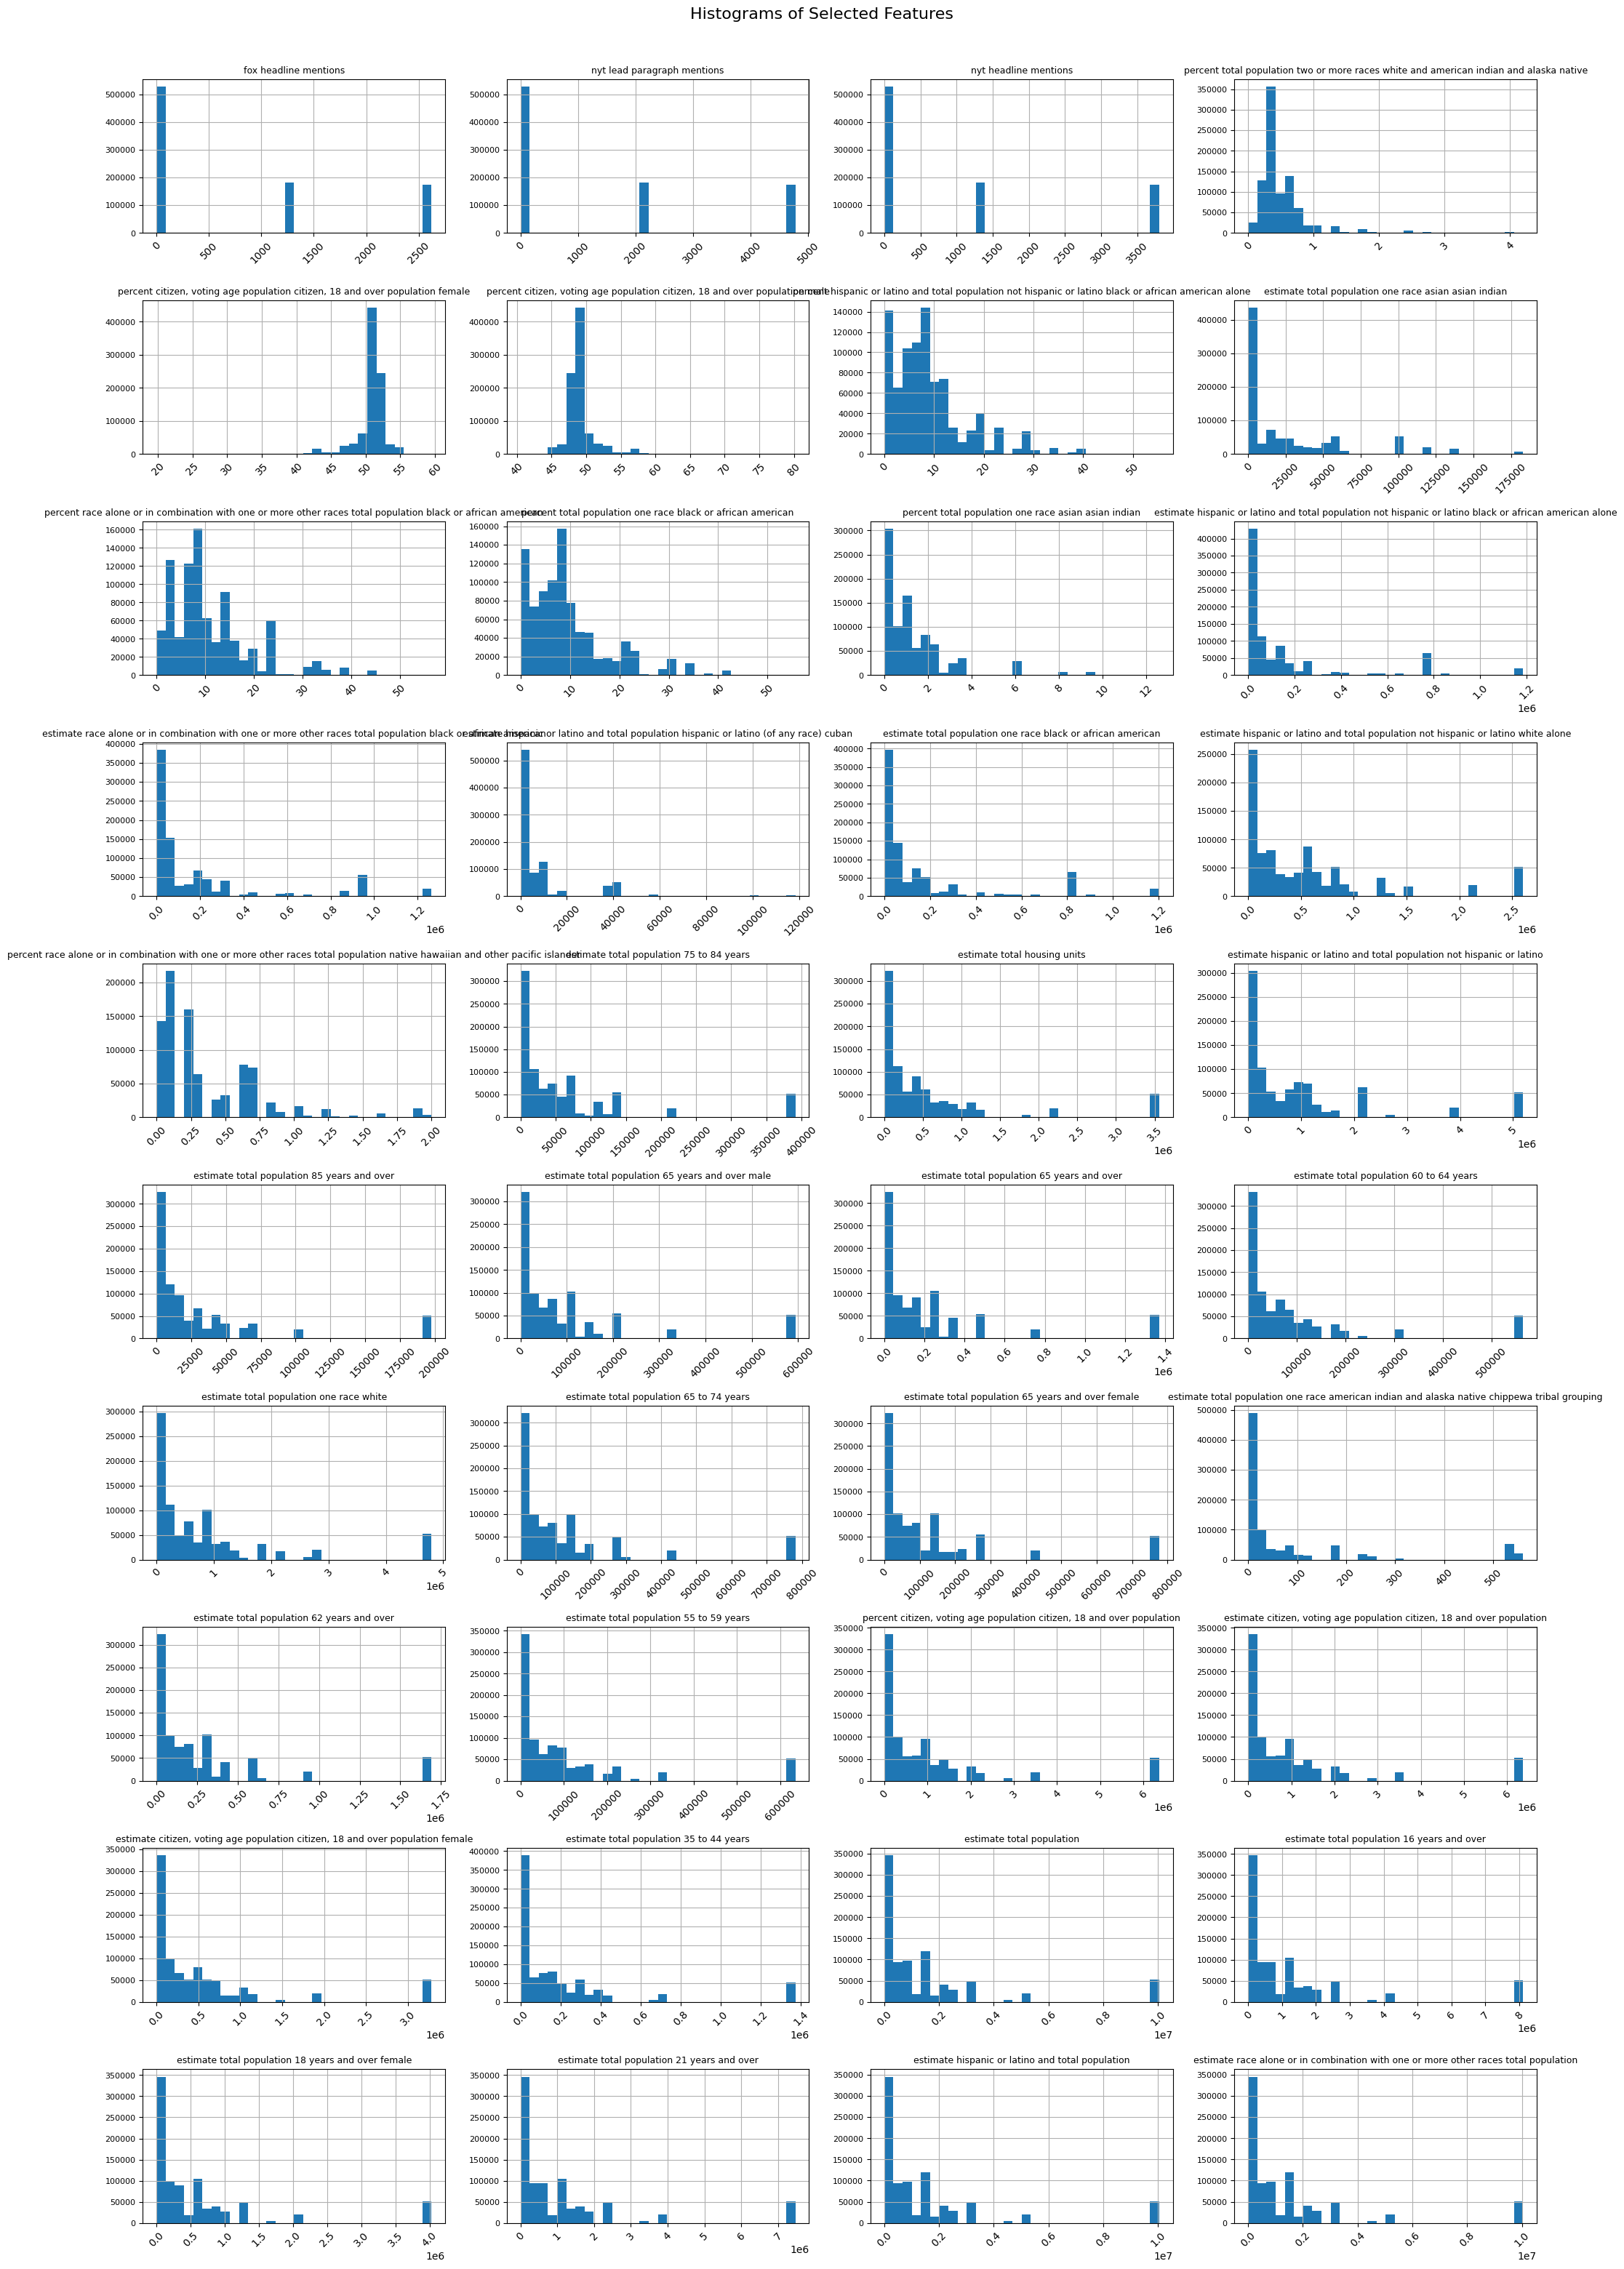

In [19]:
# Histograms for selected features
selected_feature_list = [
        'fox headline mentions', 'nyt lead paragraph mentions',
       'nyt headline mentions',
       'percent total population two or more races white and american indian and alaska native',
       'percent citizen, voting age population citizen, 18 and over population female',
       'percent citizen, voting age population citizen, 18 and over population male',
       'percent hispanic or latino and total population not hispanic or latino black or african american alone',
       'estimate total population one race asian asian indian',
       'percent race alone or in combination with one or more other races total population black or african american',
       'percent total population one race black or african american',
       'percent total population one race asian asian indian',
       'estimate hispanic or latino and total population not hispanic or latino black or african american alone',
       'estimate race alone or in combination with one or more other races total population black or african american',
       'estimate hispanic or latino and total population hispanic or latino (of any race) cuban',
       'estimate total population one race black or african american',
       'estimate hispanic or latino and total population not hispanic or latino white alone',
       'percent race alone or in combination with one or more other races total population native hawaiian and other pacific islander',
       'estimate total population 75 to 84 years',
       'estimate total housing units',
       'estimate hispanic or latino and total population not hispanic or latino',
       'estimate total population 85 years and over',
       'estimate total population 65 years and over male',
       'estimate total population 65 years and over',
       'estimate total population 60 to 64 years',
       'estimate total population one race white',
       'estimate total population 65 to 74 years',
       'estimate total population 65 years and over female',
       'estimate total population one race american indian and alaska native chippewa tribal grouping',
       'estimate total population 62 years and over',
       'estimate total population 55 to 59 years',
       'percent citizen, voting age population citizen, 18 and over population',
       'estimate citizen, voting age population citizen, 18 and over population',
       'estimate citizen, voting age population citizen, 18 and over population female',
       'estimate total population 35 to 44 years', 'estimate total population',
       'estimate total population 16 years and over',
       'estimate total population 18 years and over female',
       'estimate total population 21 years and over',
       'estimate hispanic or latino and total population',
       'estimate race alone or in combination with one or more other races total population'
]

# Plotting histograms
n_features = len(selected_feature_list)
fig, axes = plt.subplots(nrows=(n_features // 4) + 1, ncols=4, figsize=(20, 3 * ((n_features // 4) + 1)))
axes = axes.flatten()

for idx, feature in enumerate(selected_feature_list):
    df[feature].hist(bins=30, ax=axes[idx])
    axes[idx].set_title(feature, fontsize=9)
    axes[idx].tick_params(axis='x', labelrotation=45)
    axes[idx].tick_params(axis='y', labelsize=8)

for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Histograms of Selected Features', fontsize=16, y=1.02)
plt.show()

In [20]:
# Transformations
log_transform_features = [
    'fox headline mentions',
    'nyt lead paragraph mentions',
    'nyt headline mentions',
    'estimate hispanic or latino and total population not hispanic or latino black or african american alone',
    'estimate total population one race black or african american',
    'estimate race alone or in combination with one or more other races total population black or african american',
    'estimate total population one race asian asian indian',
    'estimate hispanic or latino and total population not hispanic or latino white alone',
    'estimate race alone or in combination with one or more other races total population native hawaiian and other pacific islander',
    'estimate total housing units',
    'estimate total population 65 years and over male',
    'estimate total population 65 years and over',
    'estimate total population 60 to 64 years',
    'estimate total population 55 to 59 years',
    'estimate total population 62 years and over',
    'estimate total population 85 years and over',
    'estimate total population 65 to 74 years',
    'estimate total population one race white',
    'estimate total population 18 years and over female',
    'estimate total population 21 years and over',
    'estimate total population 16 years and over',
    'estimate total population',
    'estimate hispanic or latino and total population',
    'estimate race alone or in combination with one or more other races total population'
]

# Creating log-transformed columns
for col in log_transform_features:
    df[col + ' (log)'] = np.log1p(df[col])

# Dropping original columns
df.drop(columns=log_transform_features, inplace=True)

In [23]:
# Creating new variables
df['total_media_mentions (log)'] = (
    df['fox headline mentions (log)'] +
    df['nyt lead paragraph mentions (log)'] +
    df['nyt headline mentions (log)']
)

df['citizenship_female_minus_male'] = (
    df['percent citizen, voting age population citizen, 18 and over population female'] -
    df['percent citizen, voting age population citizen, 18 and over population male']
)

In [26]:
# Final dataset
# Final features list
final_features = [
        'fox headline mentions (log)', 'nyt lead paragraph mentions (log)',
       'nyt headline mentions (log)',
       'percent total population two or more races white and american indian and alaska native',
       'percent citizen, voting age population citizen, 18 and over population female',
       'percent citizen, voting age population citizen, 18 and over population male',
       'percent hispanic or latino and total population not hispanic or latino black or african american alone',
       'estimate total population one race asian asian indian (log)',
       'percent race alone or in combination with one or more other races total population black or african american',
       'percent total population one race black or african american',
       'percent total population one race asian asian indian',
       'estimate hispanic or latino and total population not hispanic or latino black or african american alone (log)',
       'estimate race alone or in combination with one or more other races total population black or african american (log)',
       'estimate hispanic or latino and total population hispanic or latino (of any race) cuban',
       'estimate total population one race black or african american (log)',
       'estimate hispanic or latino and total population not hispanic or latino white alone (log)',
       'percent race alone or in combination with one or more other races total population native hawaiian and other pacific islander',
       'estimate total population 75 to 84 years',
       'estimate total housing units (log)',
       'estimate hispanic or latino and total population not hispanic or latino',
       'estimate total population 85 years and over (log)',
       'estimate total population 65 years and over male (log)',
       'estimate total population 65 years and over (log)',
       'estimate total population 60 to 64 years (log)',
       'estimate total population one race white (log)',
       'estimate total population 65 to 74 years (log)',
       'estimate total population 65 years and over female',
       'estimate total population one race american indian and alaska native chippewa tribal grouping',
       'estimate total population 62 years and over (log)',
       'estimate total population 55 to 59 years (log)',
       'percent citizen, voting age population citizen, 18 and over population',
       'estimate citizen, voting age population citizen, 18 and over population',
       'estimate citizen, voting age population citizen, 18 and over population female',
       'estimate total population 35 to 44 years', 'estimate total population (log)',
       'estimate total population 16 years and over (log)',
       'estimate total population 18 years and over female (log)',
       'estimate total population 21 years and over (log)',
       'estimate hispanic or latino and total population (log)',
       'estimate race alone or in combination with one or more other races total population (log)',
        'total_media_mentions (log)',
        'citizenship_female_minus_male'
]

# Adding back target variable
target = 'won_county'

# Creating final dataset
preprocessed_df = df[final_features + [target]]

print("Final dataset shape:", preprocessed_df.shape)
preprocessed_df.head()

Final dataset shape: (884751, 43)


,fox headline mentions (log),nyt lead paragraph mentions (log),nyt headline mentions (log),percent total population two or more races white and american indian and alaska native,"percent citizen, voting age population citizen, 18 and over population female","percent citizen, voting age population citizen, 18 and over population male",percent hispanic or latino and total population not hispanic or latino black or african american alone,estimate total population one race asian asian indian (log),percent race alone or in combination with one or more other races total population black or african american,percent total population one race black or african american,...,estimate total population 35 to 44 years,estimate total population (log),estimate total population 16 years and over (log),estimate total population 18 years and over female (log),estimate total population 21 years and over (log),estimate hispanic or latino and total population (log),estimate race alone or in combination with one or more other races total population (log),total_media_mentions (log),citizenship_female_minus_male,won_county
0,0.000000,0.000000,0.000000,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,0.000000,-25.8,0
1,7.167038,7.686162,7.153834,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,22.007034,-25.8,0
2,1.098612,0.000000,0.000000,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,1.098612,-25.8,0
3,0.000000,1.609438,1.098612,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,2.708050,-25.8,0
4,7.872074,8.471359,8.243283,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,24.586715,-25.8,1


In [27]:
# Creating CSV of preprocessed data
preprocessed_df.to_csv('final_preprocessed_data.csv', index=False)
files.download('final_preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>